## 0 - Library

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

## 1 - Read data

In [2]:
data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

## 2 - Exploratory Data Analysis (EDA)

In [3]:
def check_df(df):
    print("\n=== DATASET OVERVIEW ===\n")

    print("\n##### First 5 Rows #####")
    display(df.head(5))
    
    print("\n##### Last 5 Rows #####")
    display(df.tail(5))

    # Shape and Dtypes
    print("\n##########")
    print("\nShape:", df.shape)
    print("\nData Types:\n", df.dtypes)


check_df(data)


=== DATASET OVERVIEW ===


##### First 5 Rows #####


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2



##### Last 5 Rows #####


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2



##########

Shape: (1470, 35)

Data Types:
 Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptio

### HISTOGRAM - Distributions of Numeric Values

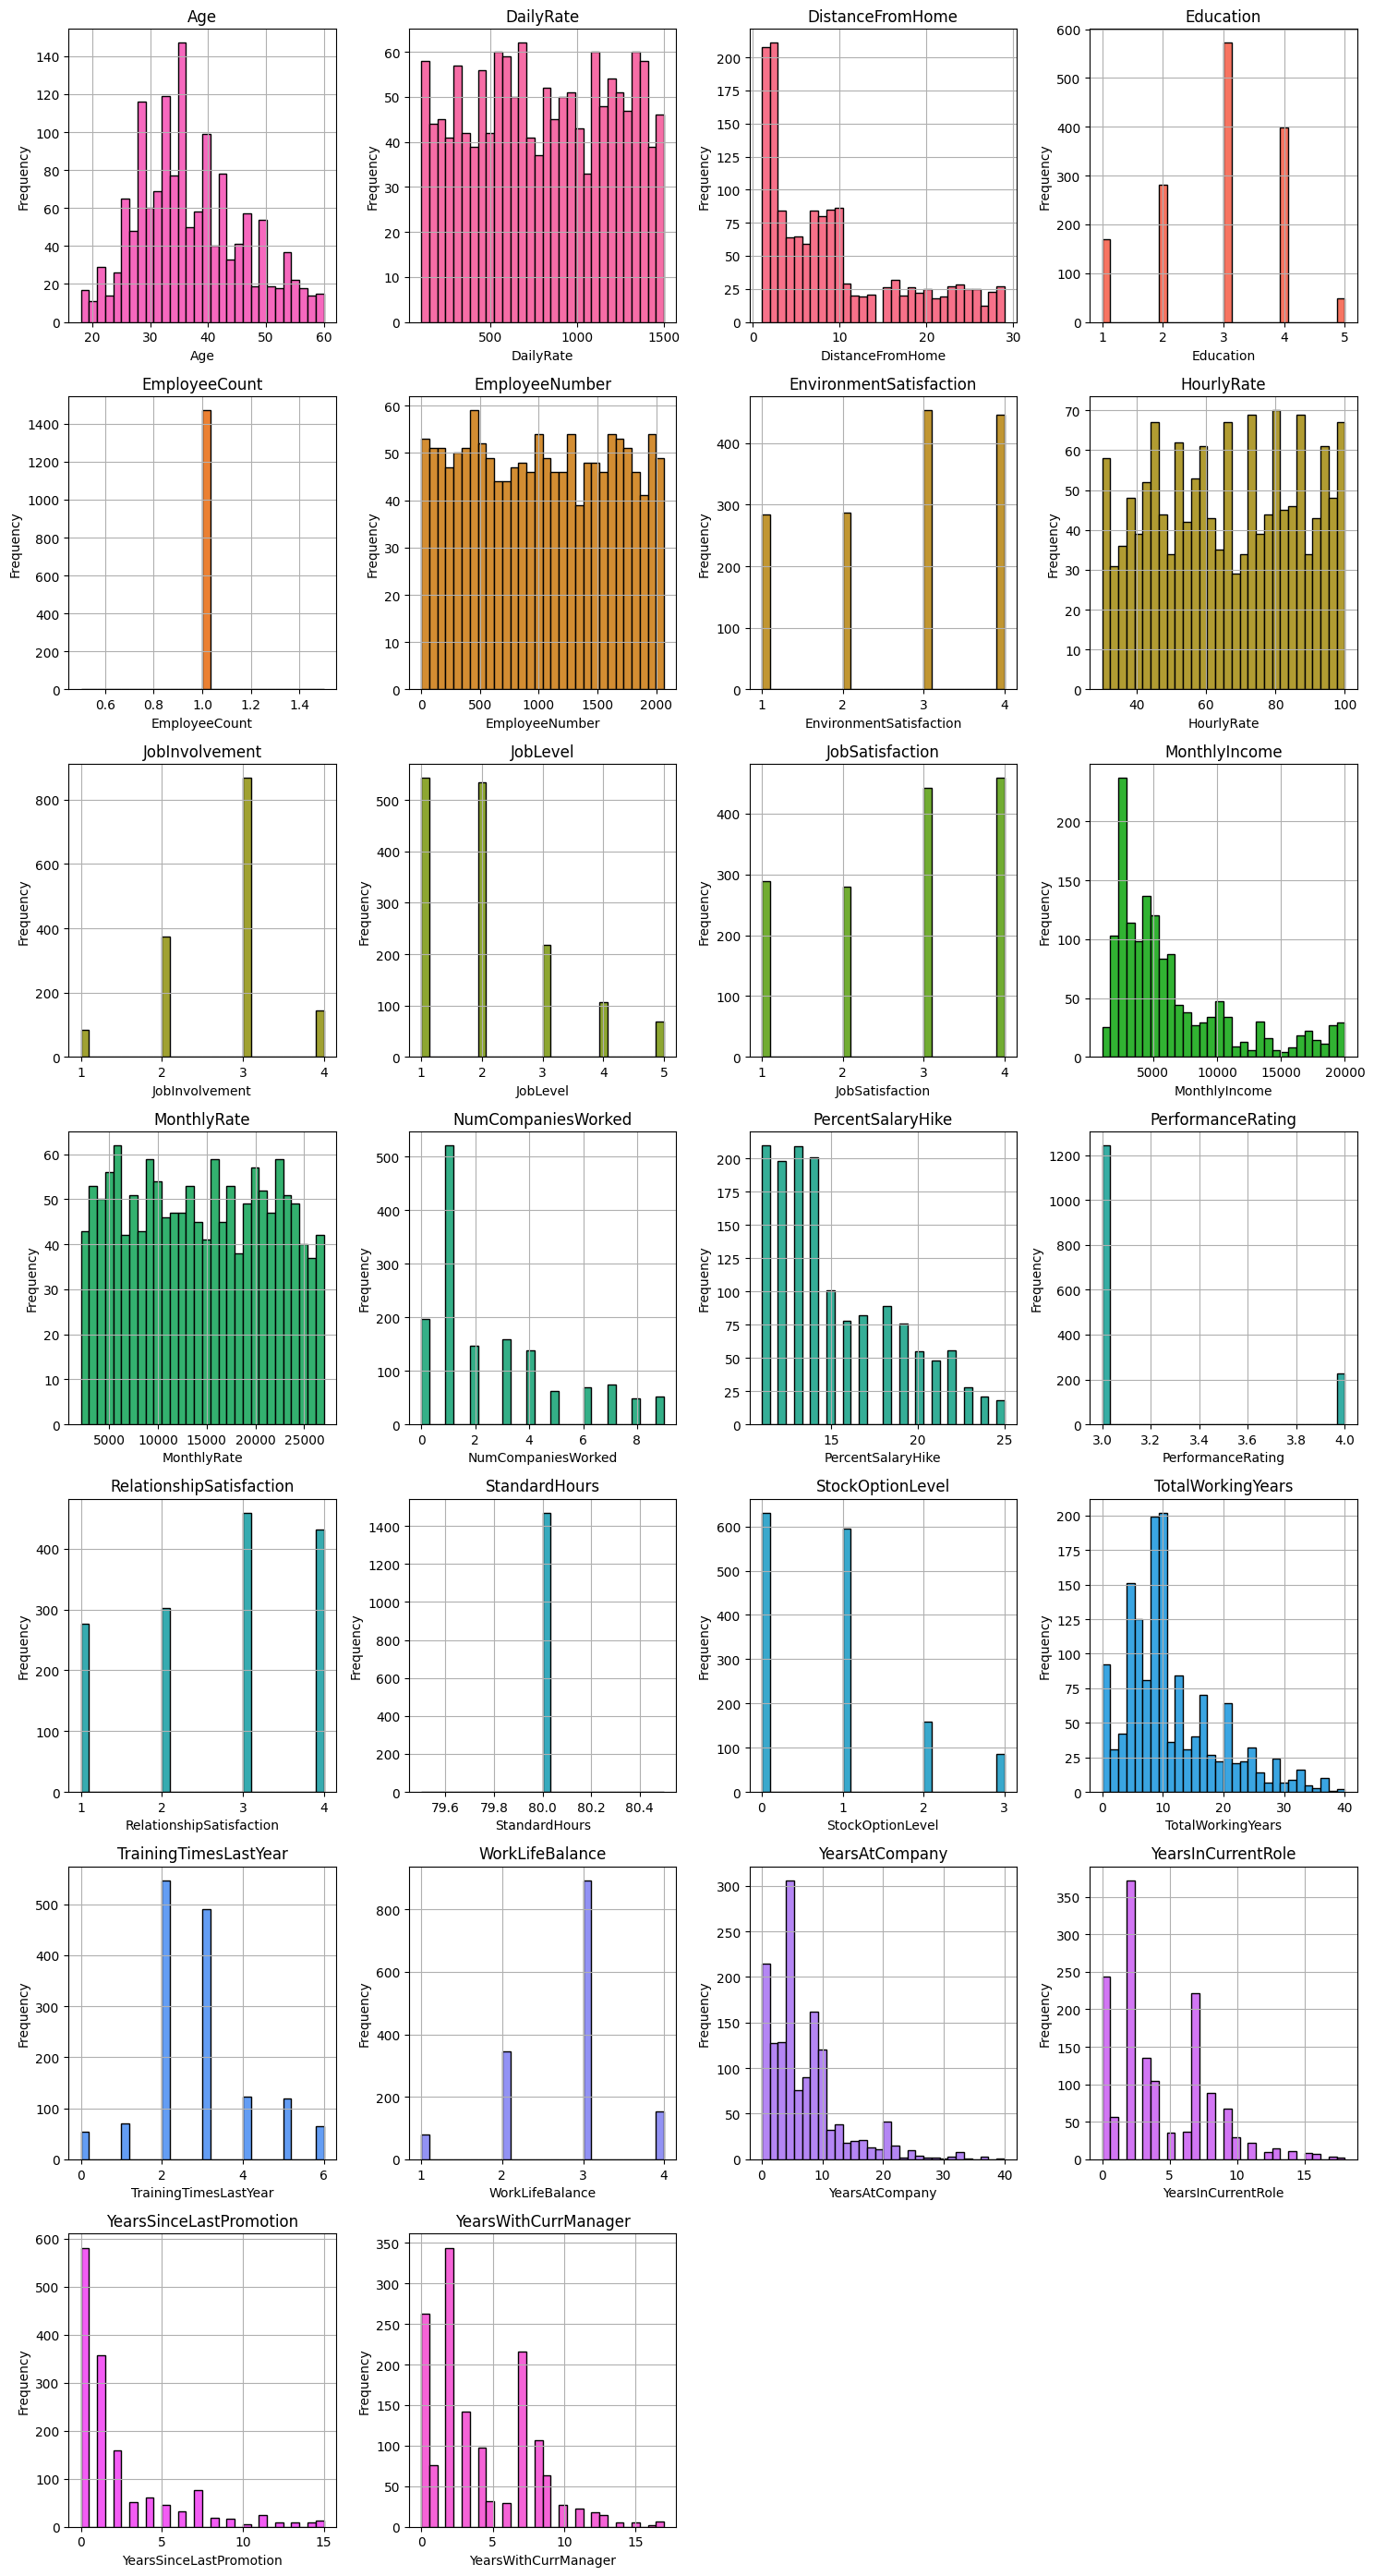

In [4]:
num_cols = [col for col in data.columns if data[col].dtypes != "O"]

def plot_numeric_distributions(df, num_cols):
    """
    Displays histograms of numerical variables side by side using subplots.

    Parameters
    ----------
    df : pandas.DataFrame
        The dataset to visualize.
    num_cols : list
        List of numerical variable names.
    """
    n = len(num_cols)
    cols = 4  # Number of plots per row
    rows = (n // cols) + 1

    plt.figure(figsize=(15, rows * 4))

    # Generate a color palette with distinct colors
    colors = sns.color_palette("husl", n)  # 'husl' palette for distinct colors

    for i, col in enumerate(num_cols, 1):
        plt.subplot(rows, cols, i)
        df[col].hist(bins=30, edgecolor='black', color=colors[i-3])  # Assign a unique color to each histogram
        plt.title(col)
        plt.xlabel(col)
        plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

plot_numeric_distributions(data, num_cols)

### HISTOGRAM - Distributions of Categorical Variables

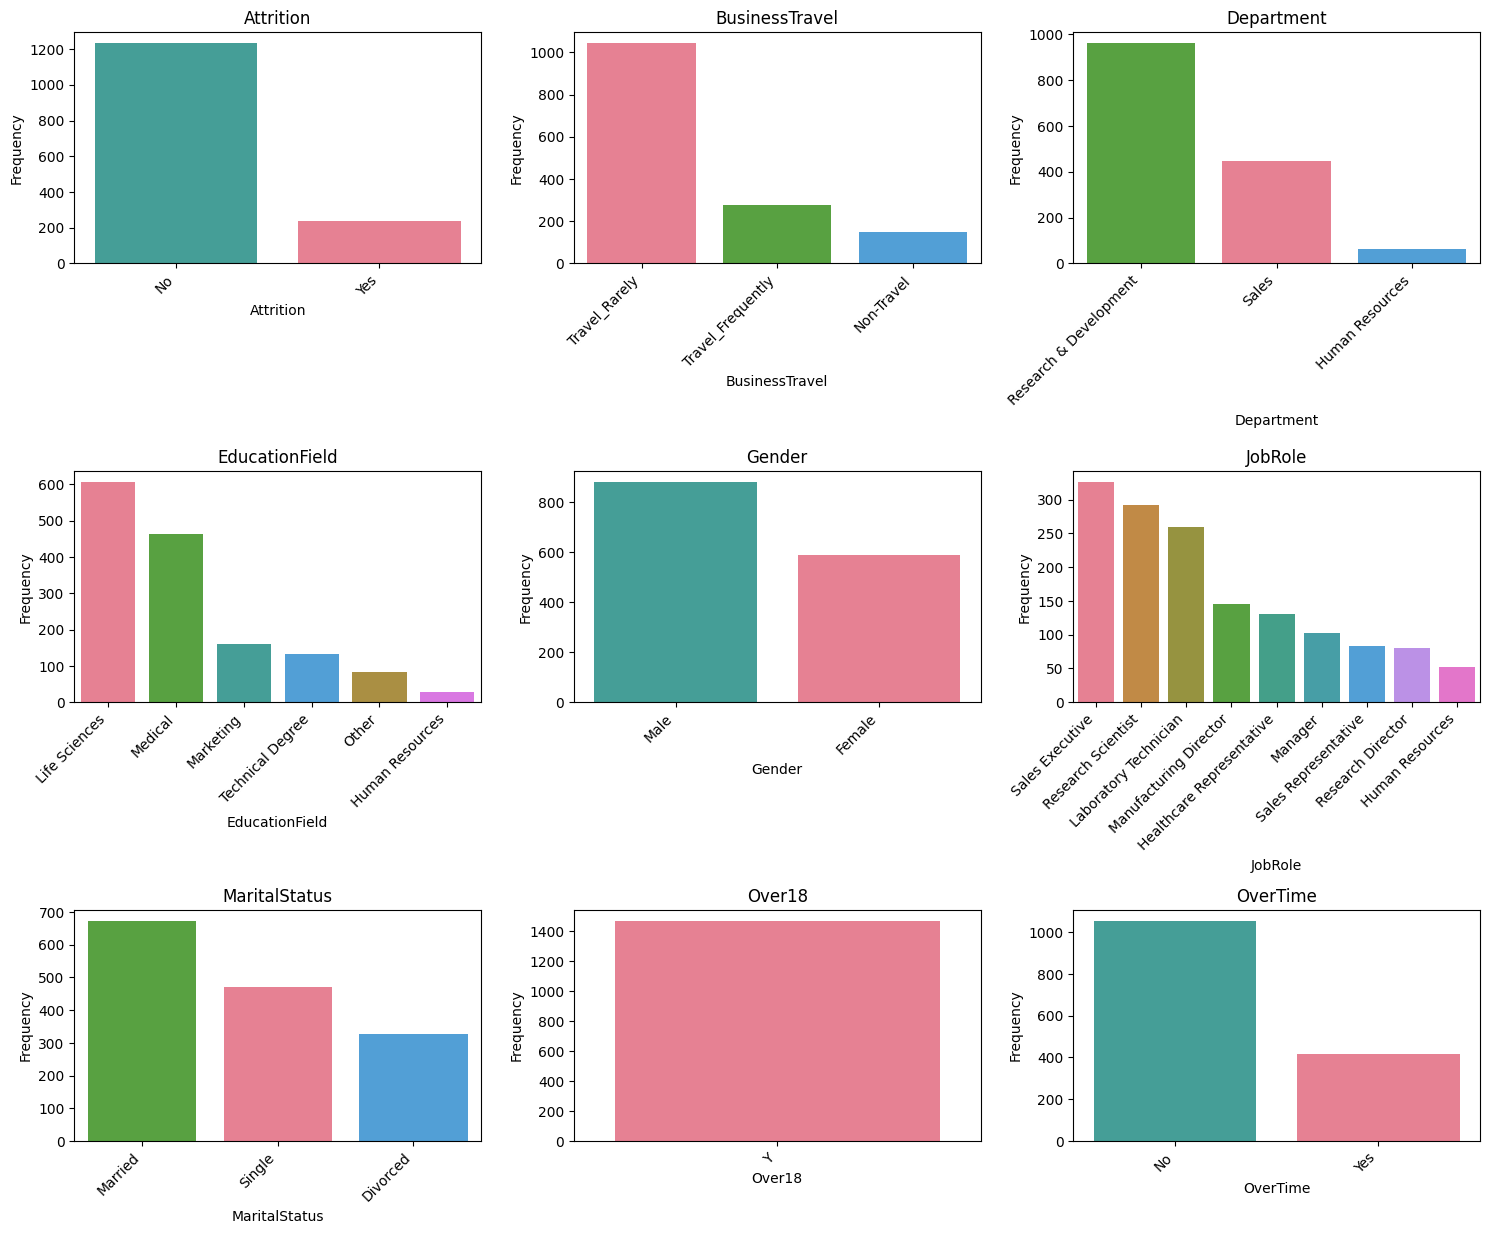

In [5]:
cat_cols = [col for col in data.columns if data[col].dtypes == "O"]

def plot_categoric_distributions(df, cat_cols, cols=3):
    """
    Displays the distributions of numerical and categorical variables side by side using subplots.

    Parameters
    ----------
    df : pandas.DataFrame
        The dataset to visualize.
    num_cols : list, optional
        List of numerical variable names.
    cat_cols : list, optional
        List of categorical variable names.
    cols : int, default=3
        Number of plots per row.
    """

    # 🔹 Distribution of categorical variables
    if cat_cols:
        n = len(cat_cols)
        rows = (n // cols) + 1
        plt.figure(figsize=(15, rows * 4))

        for i, col in enumerate(cat_cols, 1):
            plt.subplot(rows, cols, i)
            # Get unique categories for the current column
            order = df[col].value_counts().index.unique()
            
            # Generate a list of distinct colors for each category
            colors = sns.color_palette("husl", len(order))  # 'husl' palette provides distinct colors
            
            # Use the same column for hue to assign colors to each category
            sns.countplot(x=df[col], hue=df[col], order=order, palette=colors)
            plt.title(col)
            plt.xticks(rotation=45, ha='right')
            plt.ylabel("Frequency")
            # Remove the legend
            plt.legend([],[], frameon=False)

        plt.tight_layout()
        plt.show()

plot_categoric_distributions(data, cat_cols)

In [18]:
# Constant columns to be dropped
columns_to_drop = ['EmployeeCount', 'Over18', 'StandardHours']

data_ = data.copy()

# Drop columns
data_ = data_.drop(columns=columns_to_drop)

# Check the result
print("Dropped columns:", columns_to_drop)
print("Number of remaining columns:", data_.shape[1])
# print("Remaining column names:", data_.columns.tolist())

# Optionally save the cleaned dataset
# df.to_csv('cleaned_attrition_data.csv', index=False)

Dropped columns: ['EmployeeCount', 'Over18', 'StandardHours']
Number of remaining columns: 32


### Automatic Column Type Classifier

Unique Value Summary:
count      32.000000
mean      171.968750
std       435.075187
min         2.000000
25%         4.000000
50%         6.500000
75%        31.000000
max      1470.000000
dtype: float64 



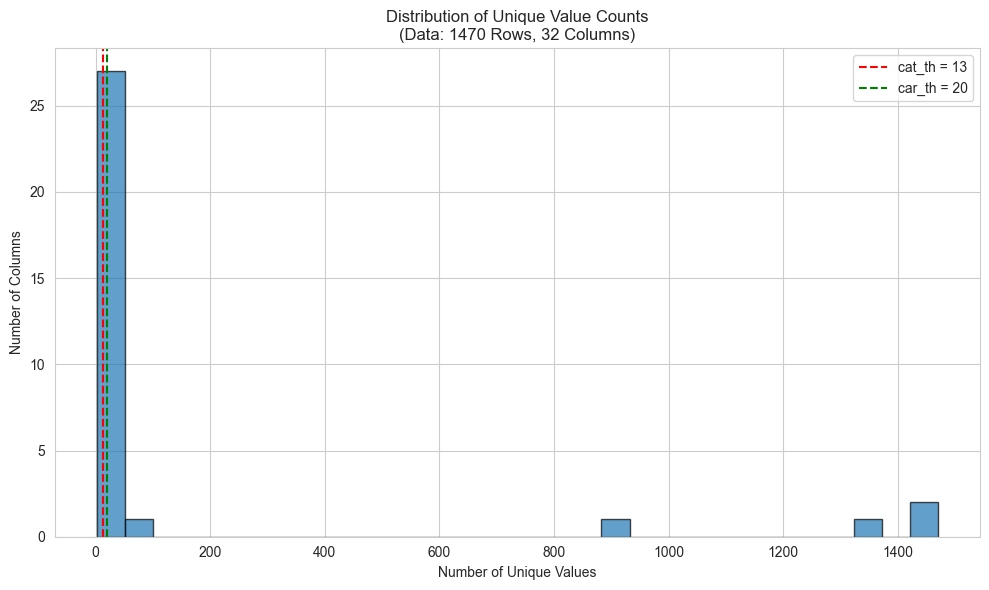

num_but_cat: ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance']
cat_but_car: []
cat_cols: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance']
num_cols: ['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Observations: 1470
Variables: 32
Categorical variables: 19
Numeric variables: 13
Cardinal categorical variables: 0
Numeric but categorical-like: 11



,Unique_Count,Type
Gender,2,Categorical
PerformanceRating,2,Categorical
OverTime,2,Categorical
Attrition,2,Categorical
Department,3,Categorical
MaritalStatus,3,Categorical
BusinessTravel,3,Categorical
WorkLifeBalance,4,Categorical
JobInvolvement,4,Categorical
RelationshipSatisfaction,4,Categorical


In [19]:
# This function classifies DataFrame columns into:
# - Categorical (cat_cols)
# - Cardinal (high-unique-value categorical) (cat_but_car)
# - Numerical (num_cols)
# It uses thresholds for flexibility and supports visualization & detailed logging.
# =============================================

def grab_col_names(df, cat_th=13, car_th=20, plot=False, verbose=False):
    """
    Separates the variables in the given DataFrame into numeric and categorical groups.
   
    Parameters
    ----------
    df : pd.DataFrame
        The pandas DataFrame to be analyzed.
    cat_th : int, optional
        Max unique values to be considered categorical (default: 13).
    car_th : int, optional
        Min unique values to be considered cardinal (default: 20).
    plot : bool, optional
        Whether to show histogram of unique value counts (default: False).
    verbose : bool, optional
        Whether to print detailed logs and show classification table (default: False).
   
    Returns
    -------
    cat_cols : list
        Categorical variable names.
    cat_but_car : list
        Cardinal categorical variable names.
    num_cols : list
        Numerical variable names.
    """
    # 1. Compute and sort the number of unique values per column
    unique_counts = df.nunique().sort_values()
    
    # Print summary statistics of unique counts if verbose is enabled
    if verbose:
        print("Unique Value Summary:")
        print(unique_counts.describe(), "\n")
    
    # 2. Plot histogram of unique value distribution (optional)
    if plot:
        plt.figure(figsize=(10, 6))
        plt.hist(unique_counts, bins=30, edgecolor='black', alpha=0.7)
        plt.axvline(cat_th, color='red', linestyle='--', label=f"cat_th = {cat_th}")
        plt.axvline(car_th, color='green', linestyle='--', label=f"car_th = {car_th}")
        plt.title(f"Distribution of Unique Value Counts\n(Data: {df.shape[0]} Rows, {df.shape[1]} Columns)")
        plt.xlabel("Number of Unique Values")
        plt.ylabel("Number of Columns")
        plt.legend()
        plt.tight_layout()
        plt.show()
    
    # 3. Classify columns based on dtype and unique value counts
    # Object-type columns → potential categorical
    cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
    
    # Numeric columns with few unique values → treat as categorical (e.g., rating 1–5)
    num_but_cat = [col for col in df.columns if df[col].nunique() < cat_th and df[col].dtypes != "O"]
    
    # Object-type columns with many unique values → cardinal (e.g., IDs, codes)
    cat_but_car = [col for col in df.columns if df[col].nunique() > car_th and df[col].dtypes == "O"]
    
    # Combine object categoricals with numeric-but-categorical
    cat_cols = cat_cols + num_but_cat
    
    # Remove cardinal columns from categorical list
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    
    # All non-object columns → initially numeric
    num_cols = [col for col in df.columns if df[col].dtypes != "O"]
    
    # Remove numeric-but-categorical from numeric list
    num_cols = [col for col in num_cols if col not in num_but_cat]
    
    # 4. Detailed output when verbose is True
    if verbose:
        print(f"num_but_cat: {num_but_cat}")
        print(f"cat_but_car: {cat_but_car}")
        print(f"cat_cols: {cat_cols}")
        print(f"num_cols: {num_cols}")
        print(f"\nObservations: {df.shape[0]}")
        print(f"Variables: {df.shape[1]}")
        print(f"Categorical variables: {len(cat_cols)}")
        print(f"Numeric variables: {len(num_cols)}")
        print(f"Cardinal categorical variables: {len(cat_but_car)}")
        print(f"Numeric but categorical-like: {len(num_but_cat)}")
        
        # Build and display classification table
        result = pd.DataFrame({
            "Unique_Count": unique_counts,
            "Type": [
                "Categorical" if col in cat_cols else
                "Cardinal" if col in cat_but_car else
                "Numeric"
                for col in unique_counts.index
            ]
        })
        print("\nVariable Classification:\n")
        display(result)
    
    # Return the three column groups
    return cat_cols, cat_but_car, num_cols, num_but_cat


cat_cols, cat_but_car, num_cols, num_but_cat = grab_col_names(data_, plot=True, verbose=True)

## 3 - MISSING VALUE - Detect Missing Values

In [8]:
# Comprehensive list of values that should be treated as missing
missing_indicators = [
    np.nan, None, pd.NA,                           # Real missing-value objects
    "", " ", "-", "--", "---", "?", "??", "???",   # Empty strings, whitespace, dashes, question marks
    "NA", "N/A", "n/a", "na", "Na", "na.", "N.A", "n.a.",  # All variants of "NA"
    "Missing", "MISSING", "missing",               # "Missing" text
    "Null", "NULL", "null",                        # "Null" variants
    "None", "NONE", "none",                        # "None" text
    # "0", "000", "999", "9999", "-999", "-9999",  # Commented out – could be real data, not safe to replace
    "unknown", "Unknown", "UNKNOWN",               # "unknown" variants
    "unavailable", "Unavail", "UNAVAILABLE",
    "not applicable", "Not applicable", "NOT APPLICABLE",
    "not recorded", "Not Recorded", "NOT RECORDED",
    "not provided", "Not Provided", "NOT PROVIDED",
    "not known", "Not Known", "NOT KNOWN"
]

# Function: Detect, count and explain missing values by type
def check_and_explain_missing(df):
    print("Checking for missing values...\n")
    df_copy = df.copy()                            # Work on a copy – never modify the original
    
    results = {}                                   # Dictionary to store per-column results
    
    for col in df.columns:                         # Loop over every column
        col_data = df[col]                         # Raw column data
        # Convert to string, strip whitespace, lower-case → normalises text for matching
        col_str = col_data.astype(str).str.strip().str.lower()
        
        # Lower-case version of string-based missing indicators
        indicators_lower = [str(x).lower() for x in missing_indicators if isinstance(x, str)]
        
        # Count true NaN-like missing values (separately for clarity)
        nan_types = {
            #  pd.NA → only object, numeric → np.nan
            "np.nan": col_data.isna().sum(),       # Covers NaN, None, pd.NA, etc.
            "None": (col_data == None).sum(),      # Python None
            "pd.NA": (col_data == pd.NA).sum() if col_data.dtype == "object" else 0  # Pandas scalar NA
        }
        nan_like_total = sum(nan_types.values())   # Total NaN-type missing
        
        # Find rows that match any string-based missing_indicator
        string_like_mask = col_str.isin(indicators_lower)  # Does the column contain missing-value strings ("na", "unknown", etc.)? → True/False mask
        string_like_total = string_like_mask.sum() # How many string-based missing values
        
        total_missing = nan_like_total + string_like_total  # Grand total missing in this column
        
        # Store details only if there is at least one missing value
        if total_missing > 0:
            # Actual string values that were found (original case)
            string_values_found = col_data[string_like_mask].unique().tolist()
            # Which NaN-like types were present
            nan_values_found = [k for k, v in nan_types.items() if v > 0]
            
            results[col] = {
                "Total Missing": total_missing,
                "NaN-like Total": nan_like_total,
                "String-like Total": string_like_total,
                "NaN-like Types": nan_values_found,
                "String-like Types": string_values_found
            }
    
    # Print a nicely formatted report
    if results:
        print("Missing values detected:\n")
        for col, info in results.items():
            print(f" {col}: {info['Total Missing']} total missing")
            print(f" • NaN-like: {info['NaN-like Total']}")
            if info['NaN-like Types']:
                print(f" Found NaN missing types: {info['NaN-like Types']}")
            print(f" • String-like: {info['String-like Total']}")
            if info['String-like Types']:
                print(f"   Found string missing types: {info['String-like Types']}")
            print()  # blank line between columns
    else:
        print("No missing values found in any column.")
        return results


missing_report= check_and_explain_missing(data_)

Checking for missing values...

No missing values found in any column.


## 4 - OUTLIERS AND RARE - Detect Outliers & Rare

In [9]:
def detect_outliers_and_rare_categories(
    df,
    target=None,
    exclude_cols=None,
    num_but_cat=None,
    rare_threshold=0.01,
    low_quantile=0.25,
    up_quantile=0.75,
    iqr_multiplier=3.0,
    use_log_transform=True,
    skew_threshold=1.0
):
    """
    Detects:
    - Outliers in continuous numeric variables using IQR (optionally with log transform)
    - Rare categories in nominal categorical variables

    Numeric-but-categorical variables are excluded from both analyses.
    """

    df_copy = df.copy()             # Work on a copy to avoid modifying original data

    exclude_cols = exclude_cols or []   # Columns to fully exclude from analysis
    num_but_cat = num_but_cat or []     # Numeric-looking categorical variables

    # -----------------------------
    # COLUMN SELECTION
    # -----------------------------
    # Select numeric columns
    num_cols = df_copy.select_dtypes(include=['number']).columns.tolist()
    
    # Select categorical columns (object or category)
    cat_cols = df_copy.select_dtypes(include=['object', 'category']).columns.tolist()
    
    # Remove excluded and numeric-but-categorical columns from numeric list
    num_cols = [
        c for c in num_cols
        if c not in exclude_cols and c not in num_but_cat
    ]

    # Remove excluded and numeric-but-categorical columns from categorical list
    cat_cols = [
        c for c in cat_cols
        if c not in exclude_cols and c not in num_but_cat
    ]
    
    outlier_report = {}             # Store numeric outlier results
    rare_report = {}                # Store rare category results

    # ==================================================
    # 1. NUMERIC OUTLIER DETECTION (CONTINUOUS ONLY)
    # ==================================================
    for col in num_cols:
        series = df_copy[col].dropna()   # Remove missing values

        if series.empty:                # Skip column if no valid data
            continue

        skew = series.skew()            # Calculate skewness
        transformed = series            # Default: no transformation
        transform_note = ""             # Keep track of transformation

        # Apply log transform if distribution is highly skewed and values are positive
        if (
            use_log_transform
            and skew > skew_threshold
            and (series > 0).all()
        ):
            transformed = np.log1p(series)
            transform_note = "log1p applied"

        # Compute IQR boundaries
        q_low = transformed.quantile(low_quantile)
        q_up = transformed.quantile(up_quantile)
        iqr = q_up - q_low

        low_limit = q_low - iqr_multiplier * iqr
        up_limit = q_up + iqr_multiplier * iqr

        # Convert limits back to original scale if log transform was used
        if transform_note:
            low_limit = np.expm1(low_limit) if low_limit > 0 else low_limit
            up_limit = np.expm1(up_limit)

        # Identify outliers based on limits
        mask = (df_copy[col] < low_limit) | (df_copy[col] > up_limit)

        # Store indices and actual outlier values
        outlier_indices = df_copy[mask].index.tolist()
        outlier_values = df_copy.loc[outlier_indices, col].tolist()

        # Save outlier information for this column
        outlier_report[col] = {
            "type": "numeric_continuous",
            "count": int(mask.sum()),
            "percentage": round(100 * mask.sum() / len(df_copy), 2),
            "lower_limit": round(float(low_limit), 2),
            "upper_limit": round(float(up_limit), 2),
            "skew": round(float(skew), 2),
            "transform": transform_note,
            "indices": outlier_indices,
            "values": outlier_values
        }

    # ==================================================
    # 2. RARE CATEGORY DETECTION (NOMINAL ONLY)
    # ==================================================
    for col in cat_cols:
        freq = df_copy[col].value_counts(normalize=True)   # Category frequencies
        rare_cats = freq[freq < rare_threshold].index.tolist()  # Rare categories
        rare_count = df_copy[col].isin(rare_cats).sum()   # Number of rare samples

        target_means = None
        if target and target in df_copy.columns:
            # Mean of target variable per category (for interpretability)
            target_means = (
                df_copy.groupby(col)[target]
                .mean()
                .round(4)
                .to_dict()
            )

        # Save rare category information
        rare_report[col] = {
            "type": "categorical_nominal",
            "total_categories": len(freq),
            "rare_categories": rare_cats,
            "rare_count": int(rare_count),
            "rare_percentage": round(100 * rare_count / len(df_copy), 2),
            "target_means": target_means
        }

    # ==================================================
    # 3. PRINT SUMMARY
    # ==================================================
    print("=" * 80)
    print(" OUTLIER & RARE CATEGORY REPORT ".center(80))
    print("=" * 80)

    # Print numeric outliers with indices and values
    print("\nNUMERIC CONTINUOUS OUTLIERS".center(100))
    print("-" * 100)
    if any(v["count"] > 0 for v in outlier_report.values()):
        for col, info in outlier_report.items():
            if info["count"] > 0:
                indices_str = ', '.join(map(str, info['indices'][:10]))
                values_str = ', '.join(map(str, [round(v, 2) for v in info['values'][:10]]))
                print(f"{col:25} → {info['count']} ({info['percentage']}%) "
                      f"[{info['lower_limit']}, {info['upper_limit']}] (skew: {info['skew']})")
                print(f"    Indices : [{indices_str}]")
                print(f"    Values  : [{values_str}]")
                print()
    else:
        print("No numeric outliers detected.")

    # Print rare categorical values
    print("\nRARE CATEGORIES (NOMINAL)".center(80))
    print("-" * 80)
    if any(v["rare_count"] > 0 for v in rare_report.values()):
        for col, info in rare_report.items():
            if info["rare_count"] > 0:
                print(
                    f"{col:22} → {info['rare_count']} "
                    f"({info['rare_percentage']}%) "
                    f"Rare: {info['rare_categories']}"
                )
    else:
        print("No rare categories detected.")

    print("\n" + "=" * 80)

    return outlier_report, rare_report


# Convert target variable to numeric
data_['Attrition_num'] = data_['Attrition'].map({'Yes': 1, 'No': 0}).astype(int)

# Run outlier and rare category detection
outlier_report, rare_report = detect_outliers_and_rare_categories(
    df=data_,
    target='Attrition_num',
    exclude_cols=['Attrition', 'Attrition_num'],
    num_but_cat=num_but_cat,
    rare_threshold=0.05,
    iqr_multiplier=3,
    use_log_transform=True,
    skew_threshold=1.0
)


                         OUTLIER & RARE CATEGORY REPORT                         
                                    
NUMERIC CONTINUOUS OUTLIERS                                    
----------------------------------------------------------------------------------------------------
YearsAtCompany            → 19 (1.29%) [-15.0, 27.0] (skew: 1.76)
    Indices : [98, 126, 190, 237, 270, 411, 473, 477, 561, 595]
    Values  : [37, 40, 33, 33, 36, 29, 31, 32, 34, 31]

YearsSinceLastPromotion   → 32 (2.18%) [-9.0, 12.0] (skew: 1.98)
    Indices : [45, 62, 123, 126, 178, 237, 326, 425, 427, 584]
    Values  : [15, 13, 15, 15, 15, 15, 13, 15, 13, 14]

                           
RARE CATEGORIES (NOMINAL)                           
--------------------------------------------------------------------------------
Department             → 63 (4.29%) Rare: ['Human Resources']
EducationField         → 27 (1.84%) Rare: ['Human Resources']
JobRole                → 52 (3.54%) Rare: ['Human Resources']

### 4.a Visualizes Detected Outliers and Rare Categories

📊 Numeric Outliers - Boxplots


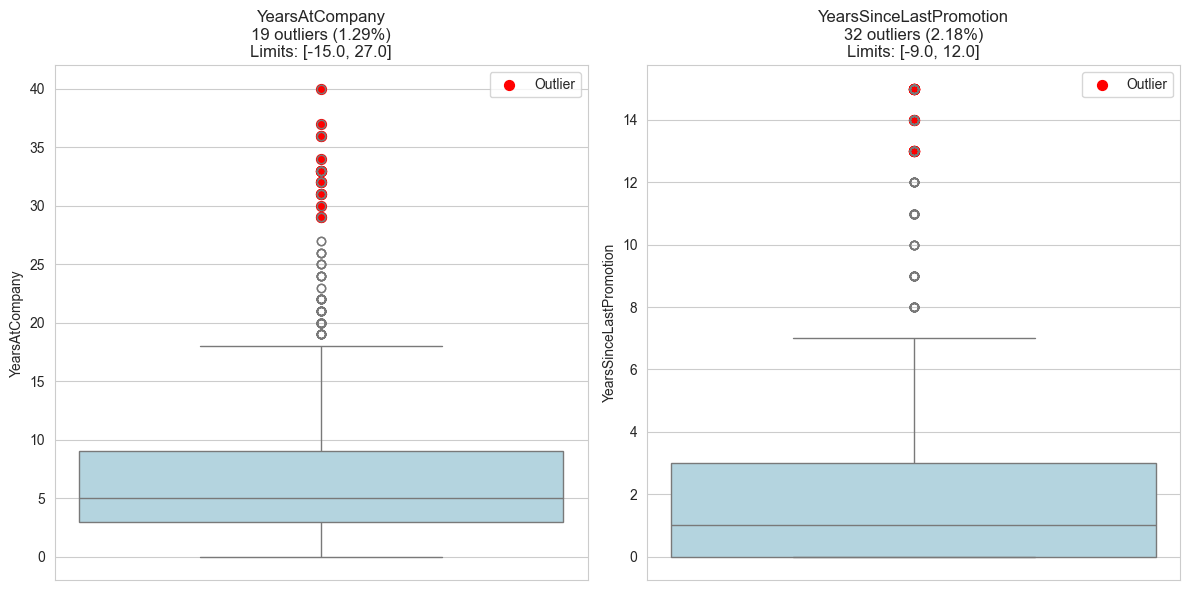

📊 Relationship Between Numeric Outliers - Scatter Plot


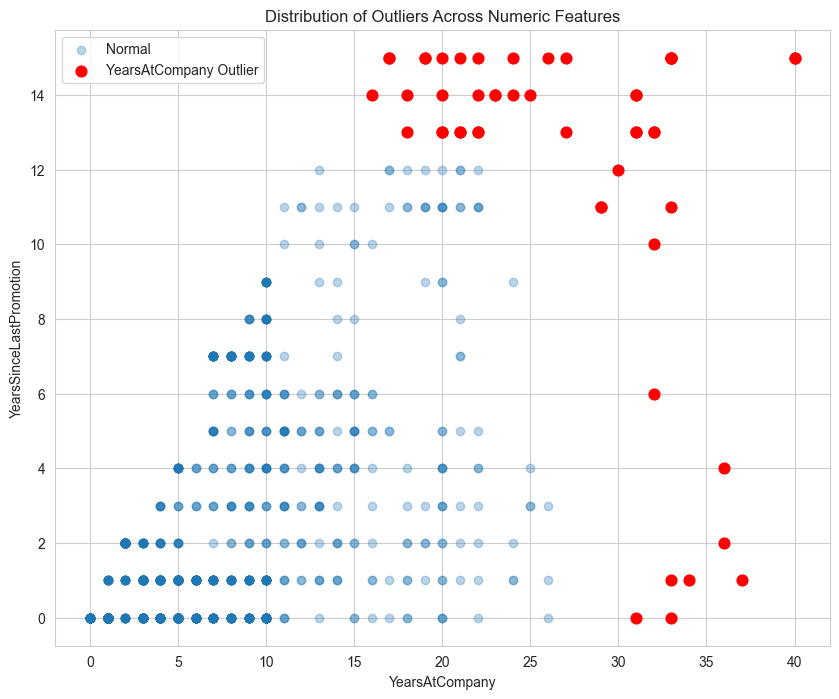

📊 Rare Categories - Bar Plots


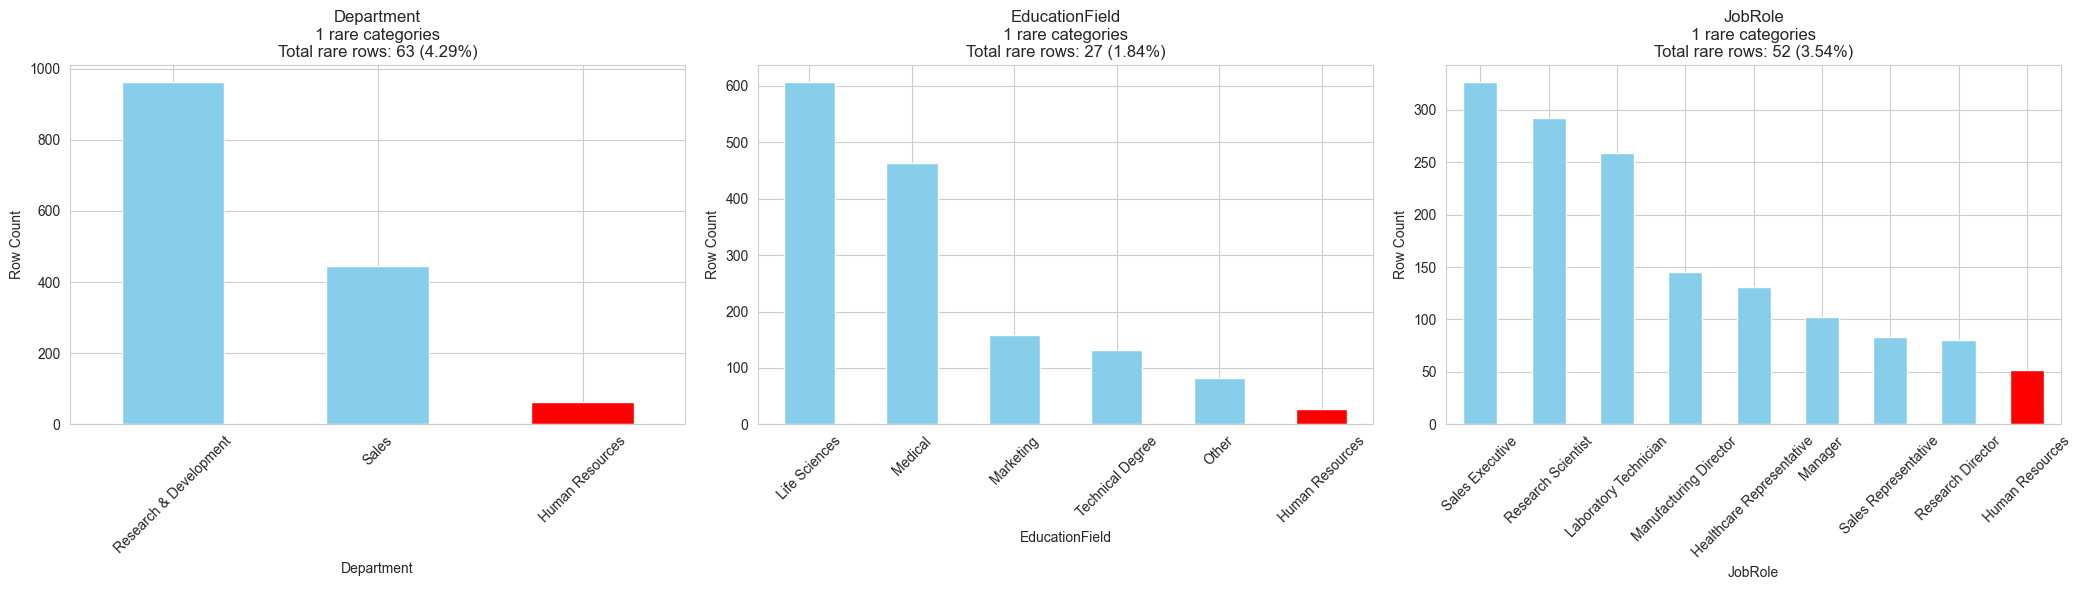

In [10]:
def visualize_outliers_and_rare(
    df,                          # Original DataFrame
    outlier_report,              # Dictionary containing numeric outlier information
    rare_report,                 # Dictionary containing rare category information
    max_outliers_show=20,        # Maximum number of outlier points to display per feature
    rare_min_count=1             # Minimum count to display a category in bar plots
):
    """
    Visualizes detected outliers and rare categories.
    - Numeric outliers: Boxplot + highlighted scatter points
    - Rare categories: Bar plots based on frequency
    """

    sns.set_style("whitegrid")   # Set seaborn plot style for better readability
    
    # -----------------------------
    # 1. NUMERIC OUTLIERS - BOXPLOTS
    # -----------------------------
    if outlier_report:           # Check if numeric outlier results exist
        
        # Select numeric columns that actually contain outliers
        num_outlier_cols = [
            col for col, info in outlier_report.items() if info['count'] > 0
        ]
        
        if num_outlier_cols:     # Continue only if at least one column has outliers
            print("📊 Numeric Outliers - Boxplots")
            
            # Create subplots dynamically based on number of columns
            fig, axes = plt.subplots(
                1,
                len(num_outlier_cols),
                figsize=(6 * len(num_outlier_cols), 6)
            )
            
            # Ensure axes is iterable when only one subplot exists
            if len(num_outlier_cols) == 1:
                axes = [axes]
            
            # Loop through each numeric column with outliers
            for ax, col in zip(axes, num_outlier_cols):
                
                # Draw boxplot for the column
                sns.boxplot(
                    y=df[col],
                    ax=ax,
                    color='lightblue'
                )
                
                # Retrieve outlier metadata for this column
                info = outlier_report[col]
                
                # Limit the number of displayed outliers
                outlier_vals = info['values'][:max_outliers_show]
                outlier_indices = info['indices'][:max_outliers_show]
                
                # Overlay outlier points as red dots
                ax.scatter(
                    x=np.zeros(len(outlier_vals)),  # Align dots vertically
                    y=outlier_vals,
                    color='red',
                    s=50,
                    label='Outlier'
                )
                
                # Set informative plot title
                ax.set_title(
                    f"{col}\n"
                    f"{info['count']} outliers ({info['percentage']}%)\n"
                    f"Limits: [{info['lower_limit']}, {info['upper_limit']}]"
                )
                
                ax.legend()      # Show legend
                
                # Apply log scale if log transformation was used
                if info['transform'] == 'log1p applied':
                    ax.set_yscale('log')
                    ax.set_ylabel(f"{col} (log scale)")
            
            plt.tight_layout()   # Adjust spacing between plots
            plt.show()           # Display the figure
        
        # -----------------------------
        # 1b. SCATTER PLOT (IF 2+ NUMERIC OUTLIERS)
        # -----------------------------
        if len(num_outlier_cols) >= 2:
            print("📊 Relationship Between Numeric Outliers - Scatter Plot")
            
            # Copy only numeric columns with outliers
            scatter_df = df[num_outlier_cols].copy()
            
            plt.figure(figsize=(10, 8))
            
            # Plot all points in light color (normal observations)
            plt.scatter(
                scatter_df.iloc[:, 0],
                scatter_df.iloc[:, 1],
                alpha=0.3,
                label='Normal'
            )
            
            # Highlight outliers in red
            for col in num_outlier_cols:
                info = outlier_report[col]
                outlier_idx = info['indices']
                
                plt.scatter(
                    df.loc[outlier_idx, num_outlier_cols[0]],
                    df.loc[outlier_idx, num_outlier_cols[1]],
                    color='red',
                    s=60,
                    label=f'{col} Outlier' if col == num_outlier_cols[0] else ""
                )
            
            plt.xlabel(num_outlier_cols[0])   # X-axis label
            plt.ylabel(num_outlier_cols[1])   # Y-axis label
            plt.title("Distribution of Outliers Across Numeric Features")
            plt.legend()
            plt.show()
    
    # -----------------------------
    # 2. RARE CATEGORIES - BAR PLOTS
    # -----------------------------
    if rare_report:              # Check if rare category results exist
        
        # Select categorical columns that contain rare categories
        rare_cols = [
            col for col, info in rare_report.items() if info['rare_count'] > 0
        ]
        
        if rare_cols:
            print("📊 Rare Categories - Bar Plots")
            
            # Create subplots dynamically
            fig, axes = plt.subplots(
                1,
                len(rare_cols),
                figsize=(7 * len(rare_cols), 6)
            )
            
            # Ensure axes is iterable
            if len(rare_cols) == 1:
                axes = [axes]
            
            # Loop through each categorical column with rare values
            for ax, col in zip(axes, rare_cols):
                
                # Count occurrences of each category
                counts = df[col].value_counts()
                
                # Color rare categories red, others blue
                colors = [
                    'red' if cat in rare_report[col]['rare_categories']
                    else 'skyblue'
                    for cat in counts.index
                ]
                
                # Draw bar plot
                counts.plot(
                    kind='bar',
                    ax=ax,
                    color=colors
                )
                
                # Set informative title
                ax.set_title(
                    f"{col}\n"
                    f"{len(rare_report[col]['rare_categories'])} rare categories\n"
                    f"Total rare rows: {rare_report[col]['rare_count']} "
                    f"({rare_report[col]['rare_percentage']}%)"
                )
                
                ax.set_ylabel("Row Count")     # Y-axis label
                ax.tick_params(axis='x', rotation=45)  # Rotate labels
            
            plt.tight_layout()
            plt.show()


# ------------------------------------------------------------
# FUNCTION CALL
# ------------------------------------------------------------
visualize_outliers_and_rare(
    df=data_,                    # DataFrame to visualize
    outlier_report=outlier_report,  # Numeric outlier analysis results
    rare_report=rare_report,        # Rare category analysis results
    max_outliers_show=20             # Limit outlier visualization
)


### 4.b Converts Rare Categories to 'Rare'

In [11]:
def rare_only_merge(
    df,                    # Input DataFrame
    rare_report,           # Dictionary containing rare category analysis
    num_but_cat=None       # Numeric-looking but categorical columns to exclude
):
    """
    Converts ONLY rare categories to 'Rare'.
    Does NOT touch outliers → meaningful extreme values are preserved.
    """

    df = df.copy()         # Create a copy to avoid modifying original DataFrame
    num_but_cat = num_but_cat or []  # Ensure it's a list if None is given

    summary = {"rare": {}} # Store summary of merged rare categories
    total_merged = 0       # Counter for total merged rows

    print("🔴 RARE CATEGORY MERGING STARTED (Outliers preserved!)")
    print("=" * 70)

    # ==================================================
    # MERGE ONLY RARE CATEGORIES (BASED ON RARE REPORT)
    # ==================================================
    for col, info in rare_report.items():   # Loop over rare report entries
        if (
            col not in df.columns           # Skip if column not in DataFrame
            or info["rare_count"] == 0      # Skip if no rare categories
            or col in num_but_cat           # Skip numeric-but-categorical columns
        ):
            continue

        rare_cats = info["rare_categories"] # List of rare category names
        mask = df[col].isin(rare_cats)      # Boolean mask for rare categories
        merged = int(mask.sum())             # Number of rows to be merged

        if merged > 0:
            df.loc[mask, col] = "Rare"       # Replace rare categories with 'Rare'
            summary["rare"][col] = (len(rare_cats), merged)  # Save merge info
            total_merged += merged           # Update total merged count

            print(
                f"{col:<25} → {len(rare_cats):>2} categories "
                f"({merged:>3} rows) → merged as 'Rare'"
            )

    print("=" * 70)
    print(
        f"📊 TOTAL: {total_merged} rows merged as rare "
        f"(%{round(100 * total_merged / len(df), 2)})"
    )
    print("YearsAtCompany and YearsSinceLastPromotion outliers are PRESERVED!")
    print("   → Long-tenure & no-promotion patterns remain intact")

    # ==================================================
    # SUMMARY REPORT
    # ==================================================
    print("\n" + "=" * 70)
    print(" RARE MERGE SUMMARY ".center(70))
    print("=" * 70)

    print("\nRARE CATEGORY MERGES")
    print("-" * 70)
    if summary["rare"]:
        for col, (cats, rows) in summary["rare"].items():
            print(
                f"{col:<30} → {cats:>2} categories "
                f"→ {rows:>4} rows → 'Rare'"
            )
    else:
        print("No rare categories were merged.")

    print("\nDATASET STATUS")
    print("-" * 70)
    num_cols = df.select_dtypes(include=[np.number]).columns  # Numeric columns
    cat_cols = df.select_dtypes(include="object").columns     # Categorical columns
    print(
        f"Rows: {df.shape[0]:>4} | "
        f"Numeric: {len(num_cols):>2} | "
        f"Categorical: {len(cat_cols):>2}"
    )
    print(f"Columns with rare merging: {len(summary['rare'])}")
    print("\n🎉 Clean dataset ready for modeling!")
    print("=" * 70)

    return df               # Return cleaned DataFrame


# ==================================================
# USAGE (Rare merge ONLY — no outlier handling)
# ==================================================
df_clean = rare_only_merge(
    df=data_,               # Original dataset
    rare_report=rare_report,# Rare category analysis output
    num_but_cat=num_but_cat # Excluded numeric-but-categorical columns
)

# Check if outliers are still preserved
print("\n🔍 OUTLIER CHECK (should be preserved):")
print("YearsAtCompany max:", df_clean["YearsAtCompany"].max())              # Expected: 40
print("YearsSinceLastPromotion max:", df_clean["YearsSinceLastPromotion"].max())  # Expected: 15

# Verify 'Rare' category creation
print("\n🔍 RARE CATEGORY CHECK:")
for col in ["Department", "EducationField", "JobRole"]:
    if col in df_clean.columns:
        print(
            f"{col}: Unique values = {df_clean[col].nunique()}, "
            f"'Rare' exists? {('Rare' in df_clean[col].values)}"
        )


🔴 RARE CATEGORY MERGING STARTED (Outliers preserved!)
Department                →  1 categories ( 63 rows) → merged as 'Rare'
EducationField            →  1 categories ( 27 rows) → merged as 'Rare'
JobRole                   →  1 categories ( 52 rows) → merged as 'Rare'
📊 TOTAL: 142 rows merged as rare (%9.66)
YearsAtCompany and YearsSinceLastPromotion outliers are PRESERVED!
   → Long-tenure & no-promotion patterns remain intact

                          RARE MERGE SUMMARY                          

RARE CATEGORY MERGES
----------------------------------------------------------------------
Department                     →  1 categories →   63 rows → 'Rare'
EducationField                 →  1 categories →   27 rows → 'Rare'
JobRole                        →  1 categories →   52 rows → 'Rare'

DATASET STATUS
----------------------------------------------------------------------
Rows: 1470 | Numeric: 25 | Categorical:  8
Columns with rare merging: 3

🎉 Clean dataset ready for modeling!

🔍

## 5. Correlation Heatmap (Encoded Categorical + Numerical Features)

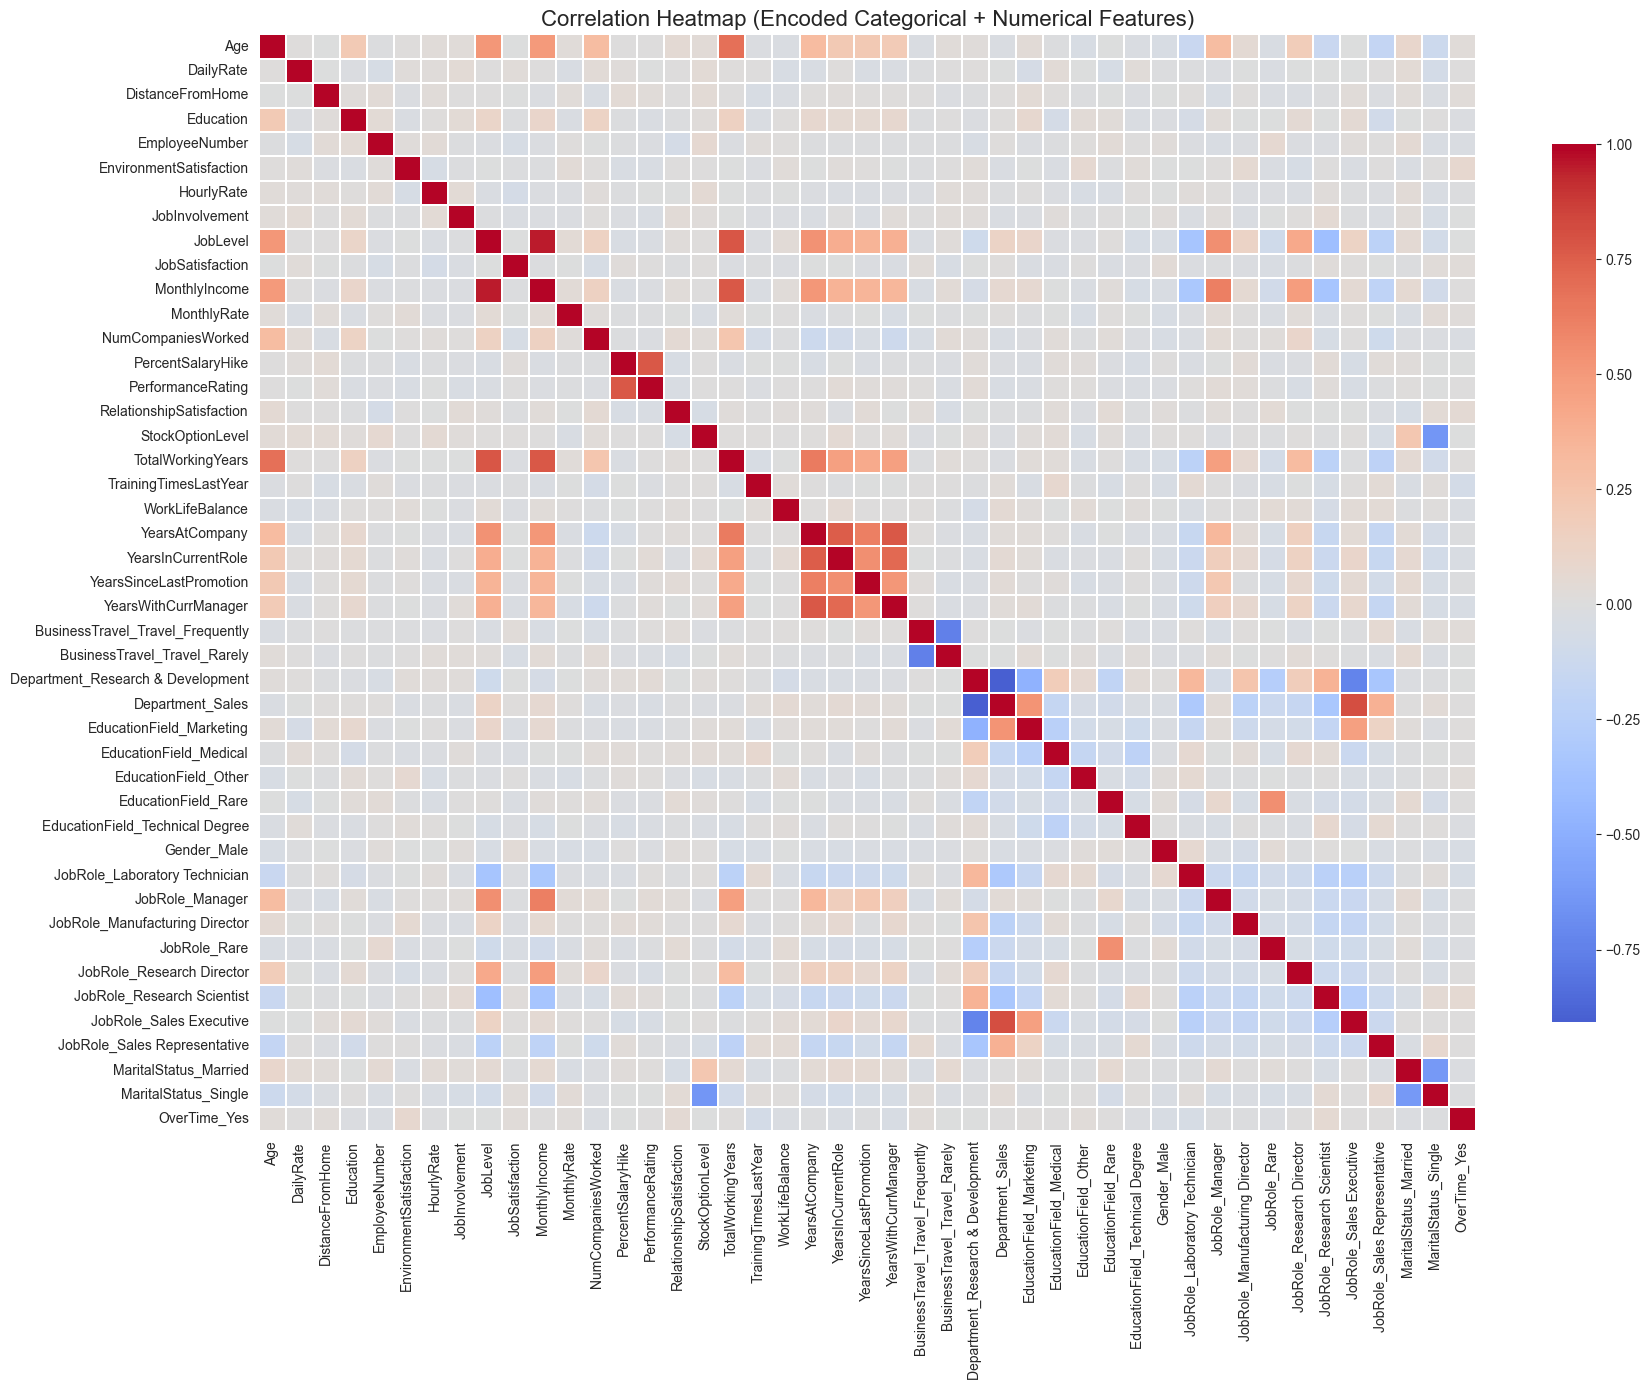

In [12]:
# ============================
# 1. Remove target variables
# ============================

df_corr = df_clean.drop(
    columns=["Attrition_num", "Attrition"]
)  
# Drop target columns to avoid target leakage in correlation analysis
# Correlation should be computed ONLY on features


# ============================
# 2. One-Hot Encoding (nominal categorical features)
# ============================

# Select categorical columns that:
# - are not numeric-but-categorical
# - are not the target variable
ohe_cols = [
    col for col in cat_cols 
    if col not in num_but_cat and col != "Attrition"
]

# Apply One-Hot Encoding to selected categorical columns
df_corr = pd.get_dummies(
    df_corr,          # DataFrame to encode
    columns=ohe_cols, # Columns to be encoded
    drop_first=True   # Drop first category to avoid dummy variable trap
)


# ============================
# 3. Correlation matrix
# ============================

corr_matrix = df_corr.corr(
    method="pearson"
)
# Compute Pearson correlation
# Measures linear relationships between features
# Values range from -1 (negative) to +1 (positive)


# ============================
# 4. Correlation Heatmap (full view)
# ============================

plt.figure(figsize=(18, 14))  # Set figure size for better visibility

sns.heatmap(
    corr_matrix,              # Correlation matrix data
    # annot=True,             # Uncomment to display correlation values
    cmap="coolwarm",          # Color map: blue (negative) → red (positive)
    center=0,                 # Center color scale at zero
    linewidths=0.3,           # Add grid lines between cells
    cbar_kws={"shrink": 0.8}  # Adjust color bar size
)

plt.title(
    "Correlation Heatmap (Encoded Categorical + Numerical Features)",
    fontsize=16
)  # Set plot title

plt.tight_layout()  # Automatically adjust spacing
plt.show()          # Display the heatmap


In [13]:
def count_unique_pairs(corr, threshold):
    upper = corr.where(
        np.triu(np.ones(corr.shape), k=1).astype(bool)
    )
    return (upper.abs() >= threshold).sum().sum()

for t in [0.5, 0.6, 0.7, 0.8]:
    print(f"Threshold {t}: {count_unique_pairs(corr_matrix, t)} unique pairs")


Threshold 0.5: 25 unique pairs
Threshold 0.6: 17 unique pairs
Threshold 0.7: 11 unique pairs
Threshold 0.8: 3 unique pairs


In [14]:
# ============================
# 1. Correlation matrix
# ============================

corr = corr_matrix.copy()
# Create a copy of the correlation matrix to avoid modifying the original


# ============================
# 2. Extract upper triangle (avoid duplicate pairs)
# ============================

upper_triangle = corr.where(
    np.triu(np.ones(corr.shape), k=1).astype(bool)
)
# Keep only the upper triangle of the matrix
# This prevents showing the same feature pair twice
# k=1 removes the diagonal (self-correlation)


# ============================
# 3. Set correlation threshold
# ============================

threshold = 0.7
# Define minimum absolute correlation value
# Features with |correlation| >= threshold will be selected


# ============================
# 4. Extract highly correlated feature pairs
# ============================

high_corr_pairs = (
    upper_triangle.stack()   # Convert matrix to long (pairwise) format
    .reset_index()           # Reset index to turn feature names into columns
)

# Rename columns for clarity
high_corr_pairs.columns = ["Feature_1", "Feature_2", "Correlation"]

# Filter pairs with high absolute correlation
high_corr_pairs = high_corr_pairs[
    high_corr_pairs["Correlation"].abs() >= threshold
].sort_values(
    by="Correlation",
    ascending=False
)
# Sort pairs by correlation strength (highest first)


high_corr_pairs
# Display highly correlated feature pairs


,Feature_1,Feature_2,Correlation
325,JobLevel,MonthlyIncome,0.950300
849,Department_Sales,JobRole_Sales Executive,0.808869
332,JobLevel,TotalWorkingYears,0.782208
494,PercentSalaryHike,PerformanceRating,0.773550
401,MonthlyIncome,TotalWorkingYears,0.772893
692,YearsAtCompany,YearsWithCurrManager,0.769212
690,YearsAtCompany,YearsInCurrentRole,0.758754
715,YearsInCurrentRole,YearsWithCurrManager,0.714365
832,Department_Research & Development,JobRole_Sales Executive,-0.733497
780,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,-0.753092


Columns to be one-hot encoded: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


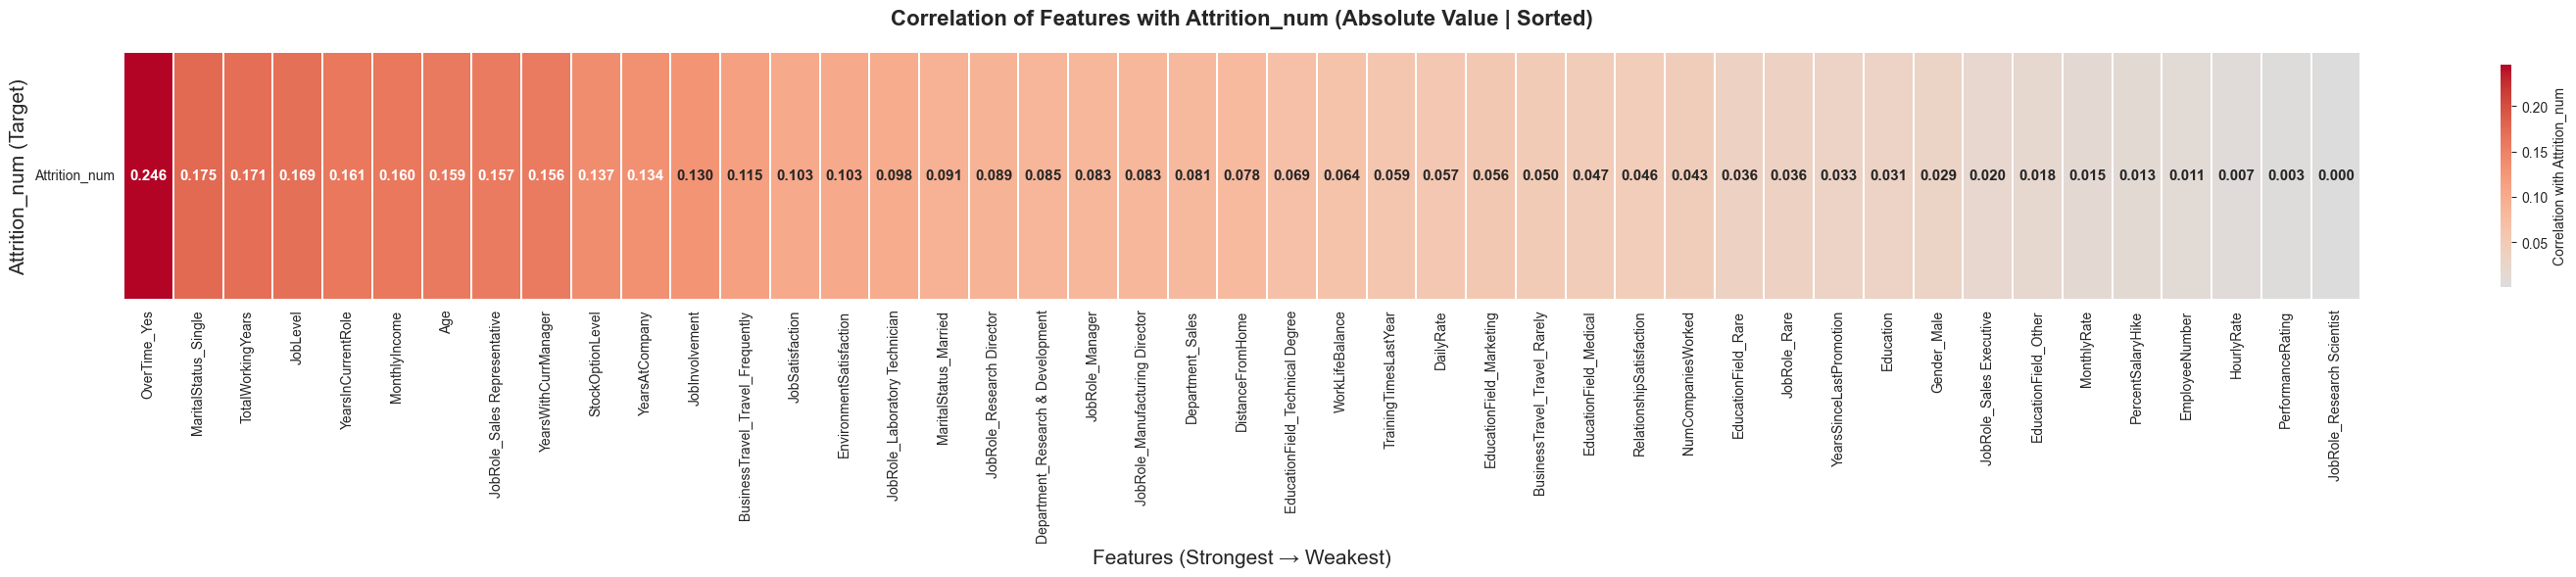


TOP 20 FEATURES MOST CORRELATED WITH ATTRITION_NUM
OverTime_Yes                         0.2461
MaritalStatus_Single                 0.1754
TotalWorkingYears                    0.1711
JobLevel                             0.1691
YearsInCurrentRole                   0.1605
MonthlyIncome                        0.1598
Age                                  0.1592
JobRole_Sales Representative         0.1572
YearsWithCurrManager                 0.1562
StockOptionLevel                     0.1371
YearsAtCompany                       0.1344
JobInvolvement                       0.1300
BusinessTravel_Travel_Frequently     0.1151
JobSatisfaction                      0.1035
EnvironmentSatisfaction              0.1034
JobRole_Laboratory Technician        0.0983
MaritalStatus_Married                0.0910
JobRole_Research Director            0.0889
Department_Research & Development    0.0853
JobRole_Manager                      0.0833
Name: Attrition_num, dtype: float64

POSITIVE CORRELATION (Increases

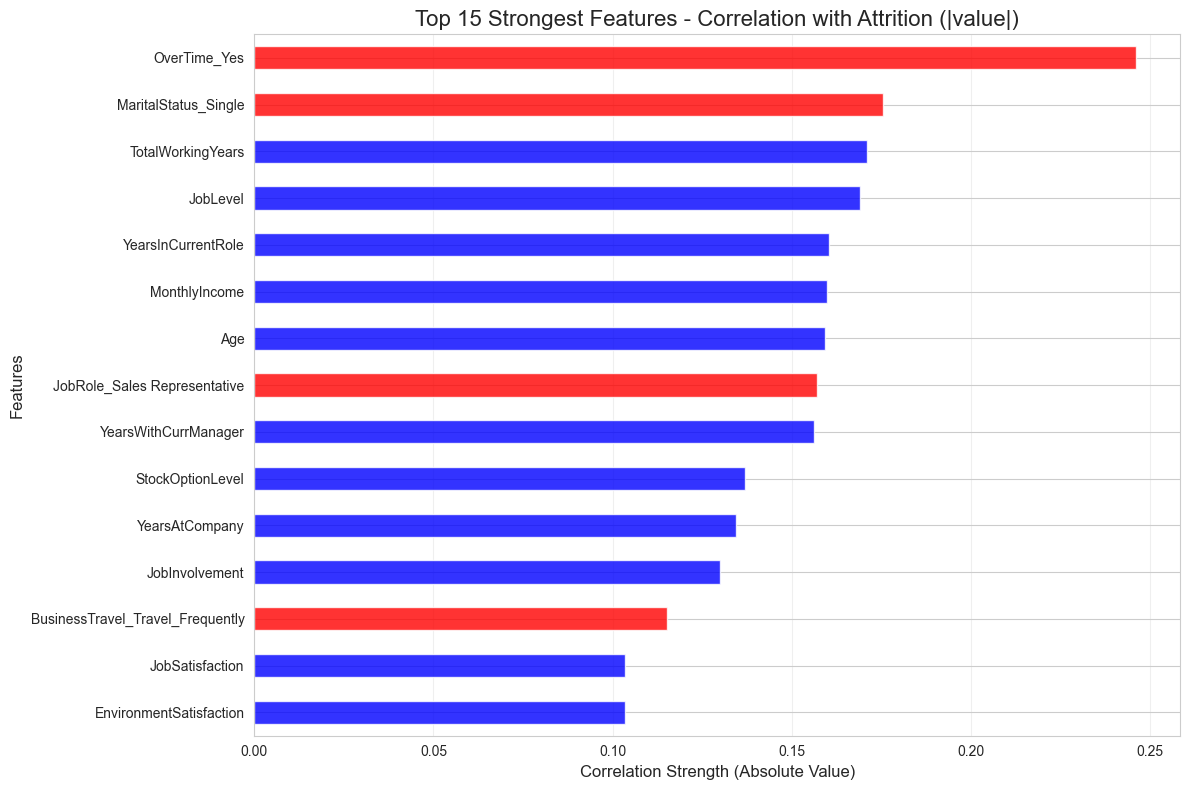


✅ Total number of features: 45
✅ Highest correlation: 0.246 (OverTime_Yes)


In [15]:
# ============================
# 1. Recreate df_corr (INCLUDING target)
# ============================

# Create a copy of the cleaned dataset for correlation analysis
df_corr = df_clean.copy()


# Combine high-cardinality categorical columns with the original target column
exclude_cols = cat_but_car + ["Attrition"]

# Drop selected columns safely (ignore if the column does not exist)
df_corr = df_corr.drop(
    columns=[col for col in exclude_cols if col in df_corr.columns],
    errors='ignore'
)


# ============================
# 2. One-Hot Encoding (nominal categorical features)
# ============================

# Select object-type columns except numeric-but-categorical ones
ohe_cols = [
    col for col in df_corr.select_dtypes(include='object').columns
    if col not in num_but_cat
]

# Print columns that will be one-hot encoded
print(f"Columns to be one-hot encoded: {ohe_cols}")

# Apply one-hot encoding and avoid the dummy variable trap
df_corr = pd.get_dummies(
    df_corr,
    columns=ohe_cols,
    drop_first=True
)


# ============================
# 3. Correlation with target (ABSOLUTE VALUE + SORTED)
# ============================

# Check if the target column exists
if 'Attrition_num' not in df_corr.columns:
    
    # Warn if the target column is missing
    print("ERROR: Attrition_num column is missing! Creating it from df_clean.")
    
    # Add the target column from df_clean
    df_corr['Attrition_num'] = df_clean['Attrition_num']
    
    # Confirm that the target column was added
    print("Attrition_num column has been added.")


# Compute Pearson correlation with the target (exclude self-correlation)
target_corr_series = (
    df_corr.corr(method="pearson")['Attrition_num']
    .drop('Attrition_num')
)


# Sort features by absolute correlation strength
target_corr = (
    target_corr_series
    .abs()
    .sort_values(ascending=False)
    .round(4)
)


# ============================
# 4. Heatmap (Horizontal - Best visualization)
# ============================

# Create a wide figure for better readability
plt.figure(figsize=(30, 6))

# Draw heatmap for correlations with the target
sns.heatmap(
    # Convert Series to a single-row DataFrame
    target_corr.to_frame().T,
    
    # Use a diverging color map
    cmap="coolwarm",
    
    # Center the color scale at zero
    center=0,
    
    # Display correlation values
    annot=True,
    
    # Format annotation numbers
    fmt=".3f",
    
    # Customize annotation style
    annot_kws={"size": 11, "weight": "bold"},
    
    # Draw grid lines
    linewidths=0.3,
    linecolor="white",
    
    # Customize the color bar
    cbar_kws={"shrink": 0.9, "label": "Correlation with Attrition_num"}
)

# Set the heatmap title
plt.title(
    "Correlation of Features with Attrition_num (Absolute Value | Sorted)",
    fontsize=16,
    fontweight="bold",
    pad=20
)

# Label the x-axis
plt.xlabel("Features (Strongest → Weakest)", fontsize=15)

# Label the y-axis
plt.ylabel("Attrition_num (Target)", fontsize=15)

# Rotate feature names for readability
plt.xticks(rotation=90)

# Keep the target label horizontal
plt.yticks(rotation=0)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the heatmap
plt.show()


# ============================
# 5. Table + TOP 20 features
# ============================

# Print separator
print("\n" + "="*80)

# Print section title
print("TOP 20 FEATURES MOST CORRELATED WITH ATTRITION_NUM")

# Print separator
print("="*80)

# Select the top 20 strongest correlated features
top_20 = target_corr.head(20)

# Display the top 20 features
print(top_20)


# ============================
# Positive vs Negative correlation split
# ============================

# Header for positive correlations
print("\nPOSITIVE CORRELATION (Increases attrition risk):")

# Show strongest positive correlations
print(target_corr_series[top_20.index].head(10))

# Header for negative correlations
print("\nNEGATIVE CORRELATION (Decreases attrition risk):")

# Show strongest negative correlations
print(target_corr_series[top_20.index].tail(10))


# ============================
# 6. Bar plot (Bonus visualization)
# ============================

# Create a figure for the bar plot
plt.figure(figsize=(12, 8))

# Select top 15 features by absolute correlation
top_20_abs = target_corr.head(15)

# Assign colors based on correlation direction
colors = [
    'red' if target_corr_series[name] > 0 else 'blue'
    for name in top_20_abs.index
]

# Plot a horizontal bar chart
top_20_abs.plot(
    kind='barh',
    color=colors,
    alpha=0.8,
    figsize=(12, 8)
)

# Set the plot title
plt.title(
    'Top 15 Strongest Features - Correlation with Attrition (|value|)',
    fontsize=16
)

# Label the x-axis
plt.xlabel('Correlation Strength (Absolute Value)', fontsize=12)

# Label the y-axis
plt.ylabel('Features', fontsize=12)

# Show the strongest feature at the top
plt.gca().invert_yaxis()

# Add grid lines
plt.grid(axis='x', alpha=0.3)

# Adjust spacing
plt.tight_layout()

# Display the plot
plt.show()


# ============================
# Final summary
# ============================

# Print the total number of features (excluding the target)
print(f"\n✅ Total number of features: {len(df_corr.columns) - 1}")

# Print the strongest correlated feature with the target
print(f"✅ Highest correlation: {target_corr.iloc[0]:.3f} ({top_20.index[0]})")


In [16]:
# ============================================================
# Feature Engineering by Combining Highly Correlated Variables
# ============================================================

# Create a copy of the cleaned dataset to avoid modifying the original
df_clean_ = df_clean.copy()


# ------------------------------------------------------------
# 1. Normalize income and experience by job level
#    (Reduces multicollinearity and captures relative strength)
# ------------------------------------------------------------

# Monthly income normalized by job level
df_clean_['IncomePerLevel'] = df_clean_['MonthlyIncome'] / df_clean_['JobLevel']

# Total working years normalized by job level
df_clean_['ExperiencePerLevel'] = df_clean_['TotalWorkingYears'] / df_clean_['JobLevel']

# Income earned per year of experience
# +1 added to avoid division by zero
df_clean_['IncomePerExperienceYear'] = (
    df_clean_['MonthlyIncome'] / (df_clean_['TotalWorkingYears'] + 1)
)


# ------------------------------------------------------------
# 2. Stability and tenure-related features
#    (Captures role and manager consistency)
# ------------------------------------------------------------

# Average stability between current role and current manager
df_clean_['RoleManagerStability'] = (
    df_clean_['YearsInCurrentRole'] + df_clean_['YearsWithCurrManager']
) / 2

# Ratio of time spent with current manager relative to company tenure
df_clean_['ManagerTenureRatio'] = (
    df_clean_['YearsWithCurrManager'] / (df_clean_['YearsAtCompany'] + 1)
)


# ------------------------------------------------------------
# 3. Promotion delay features
#    (Measures career stagnation risk)
# ------------------------------------------------------------

# Promotion delay normalized by total years at the company
df_clean_['PromotionLag'] = (
    df_clean_['YearsSinceLastPromotion'] / (df_clean_['YearsAtCompany'] + 1)
)

# Absolute promotion delay kept as an independent signal
df_clean_['YearsSinceLastPromotionNormalized'] = df_clean_['YearsSinceLastPromotion']


# ------------------------------------------------------------
# 4. Overtime and commuting burden features
#    (Captures workload and stress effects)
# ------------------------------------------------------------

# Convert OverTime from categorical to numerical
df_clean_['OverTimeNum'] = df_clean_['OverTime'].map({'Yes': 1, 'No': 0})

# Combined effect of overtime and commuting distance
df_clean_['OvertimeBurden'] = (
    df_clean_['OverTimeNum'] * df_clean_['DistanceFromHome']
)


# ------------------------------------------------------------
# 5. Business travel intensity and commute stress
# ------------------------------------------------------------

# Encode business travel frequency ordinally
travel_map = {
    'Non-Travel': 0,
    'Travel_Rarely': 1,
    'Travel_Frequently': 2
}
df_clean_['BusinessTravelNum'] = df_clean_['BusinessTravel'].map(travel_map)

# Combined effect of travel frequency and commuting distance
df_clean_['CommuteStress'] = (
    df_clean_['DistanceFromHome'] * df_clean_['BusinessTravelNum']
)


# ------------------------------------------------------------
# 6. Overall satisfaction score
#    (Aggregates multiple satisfaction dimensions)
# ------------------------------------------------------------

# Mean of job, environment, and relationship satisfaction
df_clean_['OverallSatisfaction'] = (
    df_clean_['JobSatisfaction']
    + df_clean_['EnvironmentSatisfaction']
    + df_clean_['RelationshipSatisfaction']
) / 3


# ------------------------------------------------------------
# 7. Drop original variables after feature engineering
#    (Prevents redundancy and multicollinearity)
# ------------------------------------------------------------

to_drop_after_fe = [
    'MonthlyIncome',             # Replaced by income-normalized features
    'TotalWorkingYears',         # Used in experience-based ratios
    'JobLevel',                  # Used for normalization
    'YearsInCurrentRole',        # Included in stability feature
    'YearsWithCurrManager',      # Included in stability & ratio features
    'YearsSinceLastPromotion',   # Normalized and preserved separately
    'OverTime',                  # Converted to numerical form
    'DistanceFromHome',          # Used in stress-related features
    'BusinessTravel',            # Converted to ordinal numeric form
    'JobSatisfaction',           # Included in OverallSatisfaction
    'EnvironmentSatisfaction',   # Included in OverallSatisfaction
    'RelationshipSatisfaction'   # Included in OverallSatisfaction
]

# Drop redundant columns after feature engineering
df_model = df_clean_.drop(columns=to_drop_after_fe)


# ------------------------------------------------------------
# 8. Final dataset summary
# ------------------------------------------------------------

# Print number of dropped columns
print(f"Number of dropped columns: {len(to_drop_after_fe)}")

# Print remaining feature count
print(f"Remaining number of features: {df_model.shape[1]}")

# Print remaining feature names
print("Remaining key features:", df_model.columns.tolist())

# Display final modeling dataset
df_model


Number of dropped columns: 12
Remaining number of features: 33
Remaining key features: ['Age', 'Attrition', 'DailyRate', 'Department', 'Education', 'EducationField', 'EmployeeNumber', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobRole', 'MaritalStatus', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'Attrition_num', 'IncomePerLevel', 'ExperiencePerLevel', 'IncomePerExperienceYear', 'RoleManagerStability', 'ManagerTenureRatio', 'PromotionLag', 'YearsSinceLastPromotionNormalized', 'OverTimeNum', 'OvertimeBurden', 'BusinessTravelNum', 'CommuteStress', 'OverallSatisfaction']


,Age,Attrition,DailyRate,Department,Education,EducationField,EmployeeNumber,Gender,HourlyRate,JobInvolvement,...,IncomePerExperienceYear,RoleManagerStability,ManagerTenureRatio,PromotionLag,YearsSinceLastPromotionNormalized,OverTimeNum,OvertimeBurden,BusinessTravelNum,CommuteStress,OverallSatisfaction
0,41,Yes,1102,Sales,2,Life Sciences,1,Female,94,3,...,665.888889,4.5,0.714286,0.000000,0,1,1,1,1,2.333333
1,49,No,279,Research & Development,1,Life Sciences,2,Male,61,2,...,466.363636,7.0,0.636364,0.090909,1,0,0,2,16,3.000000
2,37,Yes,1373,Research & Development,2,Other,4,Male,92,2,...,261.250000,0.0,0.000000,0.000000,0,1,2,1,2,3.000000
3,33,No,1392,Research & Development,4,Life Sciences,5,Female,56,3,...,323.222222,3.5,0.000000,0.333333,3,1,3,2,6,3.333333
4,27,No,591,Research & Development,1,Medical,7,Male,40,3,...,495.428571,2.0,0.666667,0.666667,2,0,0,1,2,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,884,Research & Development,2,Medical,2061,Male,41,4,...,142.833333,2.5,0.500000,0.000000,0,0,0,2,46,3.333333
1466,39,No,613,Research & Development,1,Medical,2062,Male,42,2,...,999.100000,7.0,0.875000,0.125000,1,0,0,1,6,2.000000
1467,27,No,155,Research & Development,3,Life Sciences,2064,Male,87,4,...,877.428571,2.5,0.428571,0.000000,0,1,4,1,4,2.000000
1468,49,No,1023,Sales,3,Medical,2065,Male,63,2,...,299.444444,7.0,0.800000,0.000000,0,0,0,2,4,3.333333


## 6. Logistic Regression

Columns to be one-hot encoded: ['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']
Final number of features: 44
Number of samples: 1470
Train size: 1029 samples, Test size: 441 samples

 LOGISTIC REGRESSION RESULTS
ROC-AUC Score: 0.8126

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.79      0.86       370
           1       0.39      0.69      0.50        71

    accuracy                           0.78       441
   macro avg       0.66      0.74      0.68       441
weighted avg       0.84      0.78      0.80       441


Confusion Matrix:
[[293  77]
 [ 22  49]]

📊 Top 15 Most Influential Features:


,Feature,Coefficient
40,JobRole_Sales Executive,0.9082
21,OverTimeNum,0.7413
34,JobRole_Laboratory Technician,0.7171
25,OverallSatisfaction,-0.7140
41,JobRole_Sales Representative,0.7120
26,Department_Research & Development,0.6022
7,NumCompaniesWorked,0.5587
20,YearsSinceLastPromotionNormalized,0.5387
43,MaritalStatus_Single,0.5016
37,JobRole_Rare,0.4494



📈 Features Increasing Attrition Risk:


,Feature,Coefficient
40,JobRole_Sales Executive,0.9082
21,OverTimeNum,0.7413
34,JobRole_Laboratory Technician,0.7171
41,JobRole_Sales Representative,0.7120
26,Department_Research & Development,0.6022
7,NumCompaniesWorked,0.5587
20,YearsSinceLastPromotionNormalized,0.5387
43,MaritalStatus_Single,0.5016
37,JobRole_Rare,0.4494
16,IncomePerExperienceYear,0.4141



📉 Features Decreasing Attrition Risk:


,Feature,Coefficient
25,OverallSatisfaction,-0.7140
14,IncomePerLevel,-0.3809
38,JobRole_Research Director,-0.2901
18,ManagerTenureRatio,-0.2681
5,JobInvolvement,-0.2630
0,Age,-0.2592
12,WorkLifeBalance,-0.2246
11,TrainingTimesLastYear,-0.1874
10,StockOptionLevel,-0.1803
8,PercentSalaryHike,-0.1796


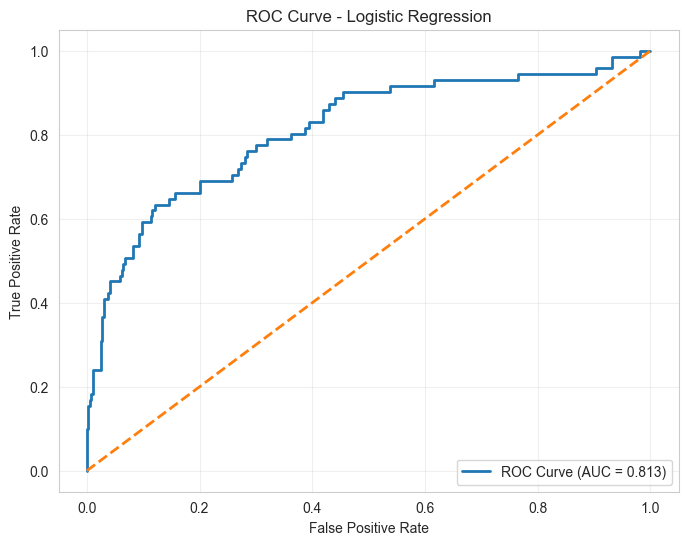

In [17]:
# ============================================================
# Column Type Inspection (FOR CONTROL PURPOSES ONLY)
# ============================================================

# Re-check column types after feature engineering
# cat_cols, cat_but_car, num_cols, num_but_cat = grab_col_names(df_model, verbose=True)


# ============================================================
# 1. Ensure correct target handling
#    - Drop string target if exists
#    - Attrition_num MUST remain
# ============================================================

# Drop original string target if still present
if 'Attrition' in df_model.columns:
    df_model = df_model.drop(columns=['Attrition'])

# Ensure numerical target exists
if 'Attrition_num' not in df_model.columns:
    df_model['Attrition_num'] = df_clean['Attrition_num']
    print("Attrition_num was missing and has been added.")


# ============================================================
# 2. Select categorical columns for One-Hot Encoding
#    (Only object-type features, excluding the target)
# ============================================================

categorical_cols = (
    df_model
    .select_dtypes(include='object')
    .columns
    .tolist()
)

print(f"Columns to be one-hot encoded: {categorical_cols}")


# ============================================================
# 3. One-Hot Encoding
#    - drop_first=True to avoid dummy variable trap
# ============================================================

df_final = pd.get_dummies(
    df_model,
    columns=categorical_cols,
    drop_first=True
)


# ============================================================
# 4. Split features (X) and target (y)
# ============================================================

# Safety check for target column
if 'Attrition_num' not in df_final.columns:
    raise ValueError("Attrition_num column is missing after encoding!")

X = df_final.drop('Attrition_num', axis=1)
y = df_final['Attrition_num']

print(f"Final number of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")


# ============================================================
# 5. Train-Test Split
#    - Stratified to preserve class imbalance
# ============================================================

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

print(
    f"Train size: {X_train.shape[0]} samples, "
    f"Test size: {X_test.shape[0]} samples"
)


# ============================================================
# 6. Feature Scaling
#    - Required for Logistic Regression
# ============================================================

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# ============================================================
# 7. Logistic Regression Model
#    - Class imbalance handled with class_weight='balanced'
# ============================================================

log_reg = LogisticRegression(
    penalty='l2',
    C=1.0,
    solver='lbfgs',
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)

log_reg.fit(X_train_scaled, y_train)


# ============================================================
# 8. Predictions and Evaluation Metrics
# ============================================================

# Class predictions
y_pred = log_reg.predict(X_test_scaled)

# Predicted probabilities for ROC-AUC
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

print("\n" + "=" * 60)
print(" LOGISTIC REGRESSION RESULTS")
print("=" * 60)

print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


# ============================================================
# 9. Model Coefficients Interpretation
#    - Sorted by absolute effect size
# ============================================================

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\n📊 Top 15 Most Influential Features:")
display(coef_df.head(15).round(4))

print("\n📈 Features Increasing Attrition Risk:")
display(coef_df[coef_df['Coefficient'] > 0].head(10).round(4))

print("\n📉 Features Decreasing Attrition Risk:")
display(coef_df[coef_df['Coefficient'] < 0].head(10).round(4))


# ============================================================
# 10. ROC Curve Visualization
# ============================================================

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(
    fpr,
    tpr,
    lw=2,
    label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.3f})'
)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()
